# ASSOCIATION RULES

#### The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.

### Dataset:
Use the Online retail dataset to apply the association rules.
Data Preprocessing:


Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [42]:
''' Actualy the dataset is in comma separated format with 7501 rows with 0 index, we can resolve this by using eiter python or in excel we can convert it manually,
since we have no column names for columns we use Excel conversion '''

' Actualy the dataset is in comma separated format with 7501 rows with 0 index, we can resolve this by using eiter python or in excel we can convert it manually,\nI used both ways here and got the same result'

In [43]:
#load the changed dataset
df=pd.read_csv('Online retail.csv',header=None)

In [44]:
#printing 10 views
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.shape

(7501, 20)

<Axes: xlabel='0'>

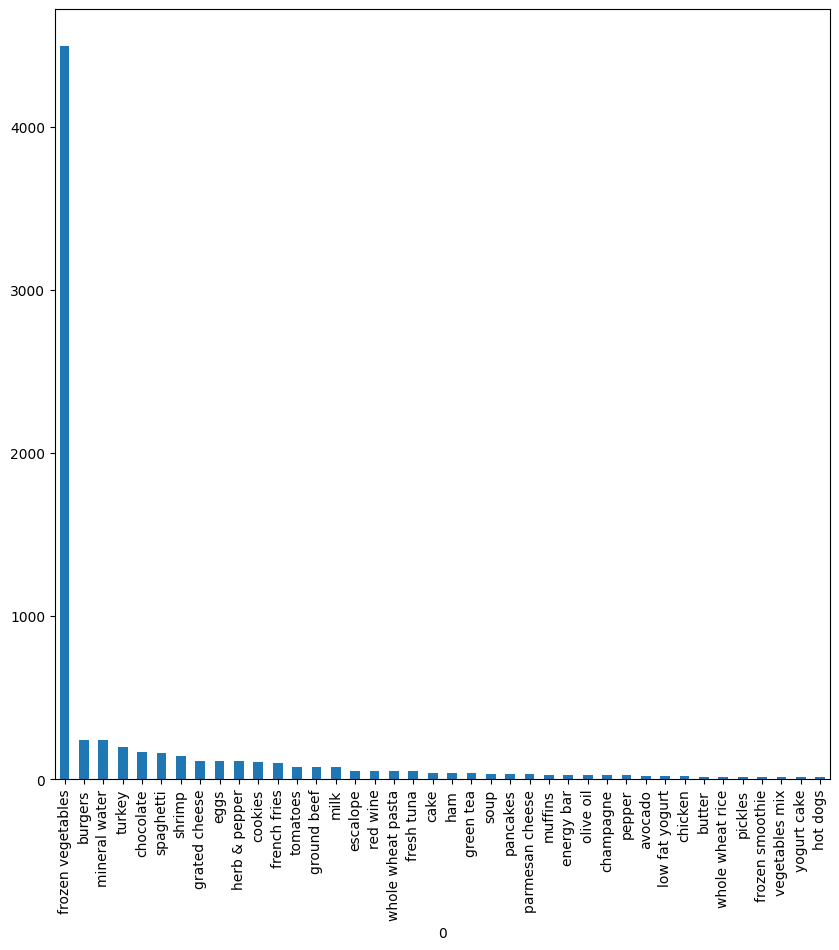

In [46]:
plt.figure(figsize=(10,10))
df[0].value_counts().head(40).plot(kind='bar') #here, we need to give head value because if we don't give the bar we will so noise for plotting all the data

In [47]:
len(df)

7501

In [48]:
df.columns #we have 7501 rows and 20 index this is a improper dataset we have to change it to proper form

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')

In [49]:
## We creating a list  and open a loop that goes till 7501 rows and appending all values from all the rows and accessing columns
transaction=[]
for i in range(0,len(df)):
    transaction.append([str(df.values[i,j]) for j in df.columns])

In [50]:
items1=[items for trans in transaction for items in trans]

In [51]:
set(items1)

{'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashed potato',
 'ma

In [52]:
items2=list(set(items1))

In [53]:
len(items2)

120

In [54]:
if 'nan' in items2:
     items2.remove('nan') ##

In [55]:
print(items2)

['light cream', 'whole weat flour', 'tea', 'salad', 'carrots', 'mint green tea', 'yams', 'burger sauce', 'spaghetti', 'tomatoes', 'pasta', 'meatballs', 'escalope', 'frozen vegetables', 'bacon', 'light mayo', 'salt', 'magazines', 'mineral water', 'fresh bread', 'cereals', 'grated cheese', 'oil', 'mint', 'sparkling water', 'parmesan cheese', 'bug spray', 'chicken', 'blueberries', 'spinach', 'cauliflower', 'body spray', 'clothes accessories', 'barbecue sauce', 'whole wheat rice', 'chili', 'olive oil', 'cake', 'dessert wine', 'herb & pepper', 'energy bar', 'strawberries', 'frozen smoothie', 'cider', 'ground beef', 'eggs', 'milk', 'green grapes', 'honey', 'low fat yogurt', 'cottage cheese', 'gluten free bar', 'water spray', 'antioxydant juice', 'tomato juice', 'white wine', 'champagne', 'pancakes', 'soda', 'pepper', 'hand protein bar', 'energy drink', 'butter', 'rice', 'bramble', 'candy bars', 'melons', 'shrimp', 'mayonnaise', 'burgers', 'french fries', 'eggplant', 'zucchini', 'protein bar'

In [56]:
len(items2) ## After removing nan

119

In [57]:
## Now from we converted transaction into set and then list and we removed nan, we did these bacause for only seeing how many unique items we have.
## we have 120 unique items with nan after removing nan we have 119 items

## Association Rule Mining:
•	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.


•	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.


•	Set appropriate threshold for support, confidence and lift to extract meaning full rules.




In [58]:
## Encoding the transaction by passing into transaction encoder for getting true, false values for each 119 values
encode=TransactionEncoder().fit(transaction)
data=encode.transform(transaction)
data.shape

(7501, 120)

In [60]:
data1=pd.DataFrame(data,columns=encode.columns_).drop(columns=['nan']) #herw, we removing nan because we removed in items2 not in transaction and converting into dataframe

In [61]:
data1.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [62]:
data1.shape

(7501, 119)

## Analysis and Interpretation:


•	Analyse the generated rules to identify interesting patterns and relationships between the products.


•	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.

In [ ]:
##apply aprior algorithms for with min support 0.02
frequent=apriori(data1,min_support=0.02,use_colnames=True)
frequent

,support,itemsets
0,0.579923,(babies food)
1,0.036395,(burgers)
2,0.031063,(cake)
3,0.023597,(chicken)
4,0.645114,(chocolate)
5,0.032262,(cookies)
6,0.073457,(eggs)
7,0.031596,(escalope)
8,0.070524,(french fries)
9,0.023997,(frozen smoothie)


In [ ]:
association_rules(frequent,metric='confidence',min_threshold=0.05) #applying association_rules with confidence metricc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(babies food),(chocolate),0.579923,0.645114,0.578323,0.997241,1.545837,1.0,0.204207,128.646181,0.840563,0.894249,0.992227,0.946854
1,(chocolate),(babies food),0.645114,0.579923,0.578323,0.896466,1.545837,1.0,0.204207,4.057394,0.994971,0.894249,0.753536,0.946854
2,(babies food),(frozen vegetables),0.579923,0.616718,0.577923,0.996552,1.615896,1.0,0.220274,111.151846,0.907329,0.934066,0.991003,0.966823
3,(frozen vegetables),(babies food),0.616718,0.579923,0.577923,0.937095,1.615896,1.0,0.220274,6.677930,0.994432,0.934066,0.850253,0.966823
4,(milk),(babies food),0.630849,0.579923,0.578056,0.916314,1.580063,1.0,0.212212,5.019712,0.994482,0.913611,0.800785,0.956548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,(frozen vegetables),"(milk, spaghetti, chocolate, babies food)",0.616718,0.577790,0.577790,0.936879,1.621487,1.0,0.221456,6.688853,1.000000,0.936879,0.850498,0.968439
180,(babies food),"(milk, spaghetti, chocolate, frozen vegetables)",0.579923,0.579123,0.577790,0.996322,1.720398,1.0,0.241943,114.425993,0.996815,0.994037,0.991261,0.997010
181,(spaghetti),"(babies food, chocolate, milk, frozen vegetables)",0.649513,0.577790,0.577790,0.889573,1.539614,1.0,0.202508,3.823437,1.000000,0.889573,0.738455,0.944787
182,(milk),"(babies food, spaghetti, chocolate, frozen veg...",0.630849,0.577790,0.577790,0.915892,1.585165,1.0,0.213291,5.019848,1.000000,0.915892,0.800791,0.957946


In [ ]:
##By this we can know that if a person buys babies food(antecedants) he also buys chocolates(consequents), like for all 119 items we have antecedants and consequents
## with its support and confidence , lift also we have

Interview Questions:


1.	What is lift and why is it important in Association rules?


2.	What is support and Confidence. How do you calculate them?


3.	What are some limitations or challenges of Association rules mining?

In [63]:
''' Lift:
          Lift in association rules measures the strength of a rule by comparing the observed support of items occurring
          together to the support that would be expected if they were independent.
          lift=support(A,B)/support(A)*support(B)
    why it is important:(0-infinity)
           Lift > 1: The items are positively associated; they appear together more often than random chance would suggest.
           The higher the lift, the stronger the association.
          Lift < 1: The items are negatively associated; they appear together less often than expected.
          This could suggest they are substitutes for one another.
          Lift = 1: The items are independent. The occurrence of one item has no impact on the likelihood of the other appearing.

        ** It overcomes the limitations of confidence: A rule like {milk} \(\rightarrow \) {bread} might have high confidence,
        but if bread is already a very popular item, the high confidence could be misleading. Lift corrects for the individual popularity of items,
         showing whether the co-occurrence of milk and bread is truly significant or just due to the high frequency of bread. '''

' Lift:\n          Lift in association rules measures the strength of a rule by comparing the observed support of items occurring \n          together to the support that would be expected if they were independent. \n          lift=support(A,B)/support(A)*support(B)\n    why it is important:(0-infinity)\n           Lift > 1: The items are positively associated; they appear together more often than random chance would suggest. \n           The higher the lift, the stronger the association.\n          Lift < 1: The items are negatively associated; they appear together less often than expected. \n          This could suggest they are substitutes for one another.\n          Lift = 1: The items are independent. The occurrence of one item has no impact on the likelihood of the other appearing. \n        \n        ** It overcomes the limitations of confidence: A rule like {milk} \\(\rightarrow \\) {bread} might have high confidence, \n        but if bread is already a very popular item, the h

In [64]:
''' Support :
            Support is defined as the ratio of the number of times an item occurs in the transactions to the total number of transactions.
            This metric thus defines the probability of the occurrence of each individual item in the transactions.
            The same logic can be extended to itemsets.
            support= (Number of transactions containing the Itemset) / (Total number of transactions in the dataset)
    Confidence:
            Confidence in an association rule measures how often the rule's conclusion is true, given that its conditions are met.
            It is calculated as the ratio of transactions containing both the antecedent and consequent items to the number of transactions containing only the antecedent.
            confidence = Support of (A, B) / Support of (A)'''

" Support :\n            Support is defined as the ratio of the number of times an item occurs in the transactions to the total number of transactions. \n            This metric thus defines the probability of the occurrence of each individual item in the transactions. \n            The same logic can be extended to itemsets. \n            support= (Number of transactions containing the Itemset) / (Total number of transactions in the dataset)\n    Confidence:\n            Confidence in an association rule measures how often the rule's conclusion is true, given that its conditions are met. \n            It is calculated as the ratio of transactions containing both the antecedent and consequent items to the number of transactions containing only the antecedent.\n            confidence = Support of (A, B) / Support of (A)"

In [65]:
''' Limitations and challenges of association rules:
                - Complex rules with numerous variables can be difficult for analysts to understand and apply effectively.
                - Association rules only indicate correlation, not causation, which can lead to incorrect conclusions if not interpreted carefully.
                -  It can struggle to find meaningful associations in datasets with rare items.
   Challenges:
        - Setting thresholds: The results are highly sensitive to the support and confidence thresholds,
        which need to be carefully selected to avoid missing important patterns or generating too much noise.

        - Domain knowledge is essential to validate the generated rules, as high confidence does not guarantee a meaningful or useful rule.'''


' Limitations and challenges of association rules:\n                - Complex rules with numerous variables can be difficult for analysts to understand and apply effectively. \n                - Association rules only indicate correlation, not causation, which can lead to incorrect conclusions if not interpreted carefully. \n                -  It can struggle to find meaningful associations in datasets with rare items. \n   Challenges:\n        - Setting thresholds: The results are highly sensitive to the support and confidence thresholds, \n        which need to be carefully selected to avoid missing important patterns or generating too much noise. \n\n        - Domain knowledge is essential to validate the generated rules, as high confidence does not guarantee a meaningful or useful rule.'